In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import iqr
import seaborn as sns

In [2]:
# Reading in each csv file for the imputed data
data = pd.read_csv('imputed_data.csv', encoding = 'ISO-8859-1')
data.head()

,Unnamed: 0,year,agent,state,status,pay_method,lp_amount,lp_type,prod,income,months,18_months
0,0,2014.0,Church Bulletin 0011 (109398),MA,Returned < 90 days,credit card,34.95,Refund,1.0,74467.0,0.87,0
1,1,2015.0,Benefits and More 4 Paid (143595),MA,Returned < 90 days,credit card,29.95,Sale,1.0,74467.0,0.00,0
2,2,2016.0,Benefits and More 4 Paid (143595),MA,Switched to LW,credit card,29.95,Sale,1.0,74467.0,0.00,0
3,3,2016.0,Benefits and More 4 Paid (143595),MA,Returned < 90 days,credit card,39.95,Refund,1.0,74467.0,0.67,0
4,5,2014.0,Newspaper (109455),MA,Decline,credit card,34.95,Sale,1.0,55937.0,0.57,0


In [3]:
# Separating out the y variable and selecting the continuous data that needs to be normalize
Y = data['18_months']
outlier_data = data[['lp_amount', 'income', 'prod']]
data = data.drop(['lp_amount', 'income', 'prod'], axis=1)

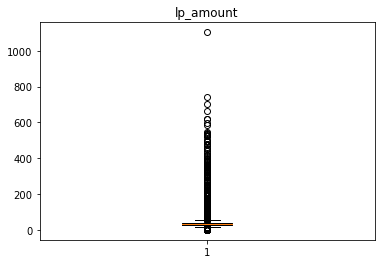

In [4]:
# Creating a boxplot for the 'lp_amount' column
plt.boxplot(outlier_data['lp_amount'])    
# Naming the box plot after the name of the column  
plt.title('lp_amount')
plt.show()

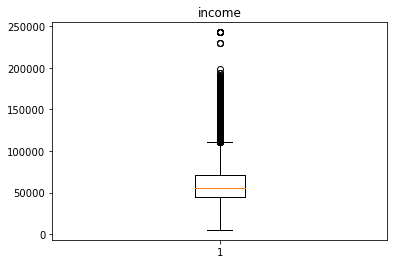

In [5]:
# Creating a boxplot for the 'income' column
plt.boxplot(outlier_data['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

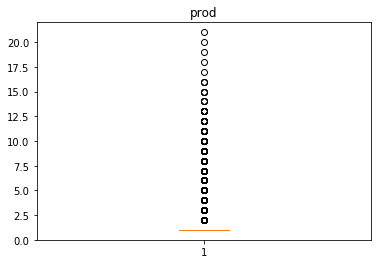

In [6]:
# Creating a boxplot for the 'prod' column
plt.boxplot(outlier_data['prod'])    
# Naming the box plot after the name of the column  
plt.title('prod')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd03c580c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd03c5802b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd03c580ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd03c547f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd03c547c50>],
 'means': []}

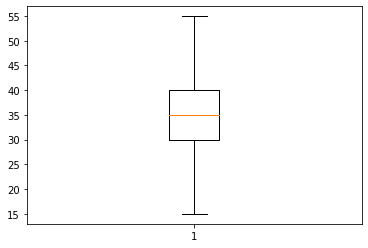

In [7]:
# Defining the function 'outlier' to help with major outliers in the 'lp_amount' column

def outlier(x):
    if x > (Q3 + (1.5*IQR)):
        x=Q3
    elif x <(Q1 - (1.5*IQR)):
        x=Q1
    else:
        pass
    return(x)

Q1 = outlier_data['lp_amount'].quantile(0.25)
Q3 = outlier_data['lp_amount'].quantile(0.75)
IQR = iqr(outlier_data['lp_amount'])
outlier_data['lp_amount'] = outlier_data['lp_amount'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['lp_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd03c5f0f60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd03c5f0ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd03c649f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd03c5f0898>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd03c558cf8>],
 'means': []}

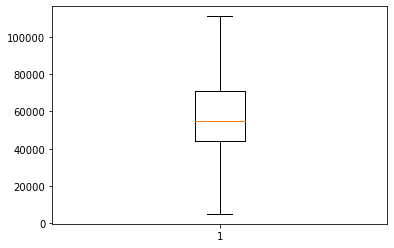

In [8]:
# Using the same definition and method above and apply it to the 'income' column
Q1 = outlier_data['income'].quantile(0.25)
Q3 = outlier_data['income'].quantile(0.75)
IQR = iqr(outlier_data['income'])
outlier_data['income'] = outlier_data['income'].apply(lambda x: outlier(x))

# Plotting the box plot
plt.boxplot(outlier_data['income'])

In [9]:
outlier_data.mean()

lp_amount       35.185814
income       57642.258229
prod             1.402031
dtype: float64

In [10]:
# Creating the columns names to be inputed into the new normalized data
norm_cols = ['lp_amount', 'income', 'prod']

# Normalizing the two columns in 'outlier_data' using the MinMax function
minmax = preprocessing.MinMaxScaler()
norm = (minmax.fit_transform(outlier_data))
norm = pd.DataFrame(norm, columns=norm_cols)

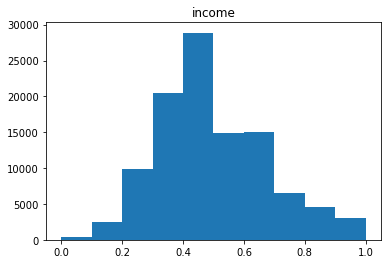

In [11]:
# Creating a histogram for the 'income' column
plt.hist(norm['income'])    
# Naming the box plot after the name of the column     
plt.title('income')
plt.show()

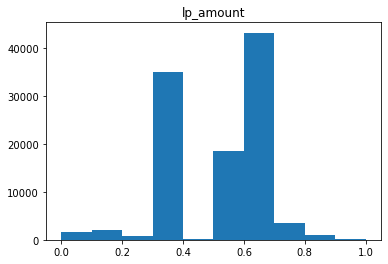

In [12]:
# Creating a histogram for the 'lp_amount' column
plt.hist(norm['lp_amount'])    
# Naming the box plot after the name of the column     
plt.title('lp_amount')
plt.show()

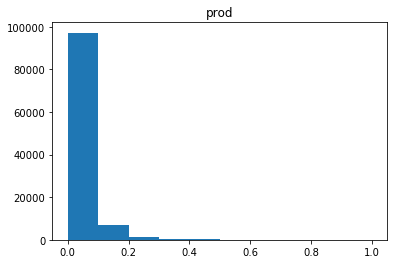

In [13]:
# Creating a histogram for the 'prod' column
plt.hist(norm['prod'])    
# Naming the box plot after the name of the column     
plt.title('prod')
plt.show()

In [14]:
norm.mean()

lp_amount    0.505895
income       0.496311
prod         0.020102
dtype: float64

In [15]:
# Combining the two datasets (first and normalized) back into one
data = pd.concat([data, norm], axis = 1)

# Dropping the unneeded 'Unnamed:0' column
data = data.drop(['Unnamed: 0'], axis = 1)

# Changing the order of the columns in the new concatenated dataset
data = data[['year', 'agent', 'state', 'pay_method', 'lp_type', 'lp_amount', 'income', 'prod', 'months', '18_months']]

#Renaming the 18_months column to 'Y'
data['Y'] = data['18_months']
data = data.drop(['18_months'], axis = 1)

data.head()

,year,agent,state,pay_method,lp_type,lp_amount,income,prod,months,Y
0,2014.0,Church Bulletin 0011 (109398),MA,credit card,Refund,0.500,0.654935,0.0,0.87,0
1,2015.0,Benefits and More 4 Paid (143595),MA,credit card,Sale,0.375,0.654935,0.0,0.00,0
2,2016.0,Benefits and More 4 Paid (143595),MA,credit card,Sale,0.375,0.654935,0.0,0.00,0
3,2016.0,Benefits and More 4 Paid (143595),MA,credit card,Refund,0.625,0.654935,0.0,0.67,0
4,2014.0,Newspaper (109455),MA,credit card,Sale,0.500,0.480234,0.0,0.57,0


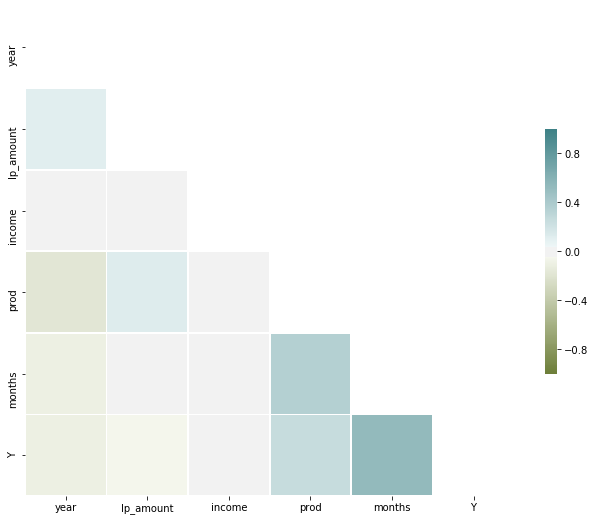

In [16]:
### I AM USING THIS CODE FROM COMPETITION 1

## We will make it look nicer to the eye
# Visualizing a Correlation Matrix
correlation_visual = data.corr(method='spearman')

# Have to generate a mask(hide) for the upper triangle
hide = np.zeros_like(correlation_visual, dtype=np.bool)
hide[np.triu_indices_from(hide)] = True

# Setting the subplot for the correlation matrix
f , ax = plt.subplots(figsize=(11,9))

# Generating a diverging colormap
cmap = sns.diverging_palette(100, 200, as_cmap=True)

# Adding the heatmap
sns.heatmap(correlation_visual, mask=hide, cmap=cmap, vmin=-1,vmax=1, center=0, square=True, linewidths=.6, cbar_kws={"shrink": .5})